In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline
version = '01'

## Dataset loading

In [7]:
right = pd.read_csv("../data/right.txt", header=None).values.tolist()
left = pd.read_csv("../data/left.txt", header=None).values.tolist()

## Pre-processing

In [8]:
batch_size = 200
batch_right = [right[i:i + batch_size] for i in range(0, len(right), batch_size)]
batch_left = [left[i:i + batch_size] for i in range(0, len(left), batch_size)]

X = np.array(batch_right + batch_left)
y = np.array([0]*len(batch_right) + [1]*len(batch_left))

In [9]:
print(f'X shape: {X.shape}\ny shape: {y.shape}')

X shape: (600, 200, 2)
y shape: (600,)


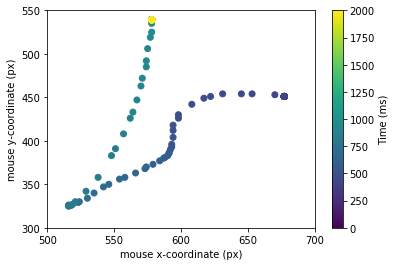

In [10]:
import matplotlib.cm as cm
batch_index = 26

colors = np.linspace(0, 2000, X.shape[1])

sc = plt.scatter(X[batch_index,:,0], X[batch_index,:,1] , c=colors, cmap='viridis')
clb = plt.colorbar()
clb.set_label('Time (ms)')
plt.xlabel('mouse x-coordinate (px)')
plt.ylabel('mouse y-coordinate (px)')
plt.xlim(500, 700)
plt.ylim(300, 550)
plt.xticks(np.arange(500, 701, 50));

#plt.savefig('../plots/batch_example.png')

## Training/dev/test set splitting

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
X_dev, X_test, y_dev, y_test = train_test_split(X_train, y_train, test_size=0.5, random_state=1)

## Model definition

In [20]:
model = Sequential()
model.add(LSTM(256, input_shape=(batch_size, 2)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               265216    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 265,473
Trainable params: 265,473
Non-trainable params: 0
_________________________________________________________________


## Model training

In [21]:
adam = Adam(lr=0.001)
chk = ModelCheckpoint(f'../models/best_model_{version}.pkl', monitor='acc', save_best_only=True, mode='max', verbose=0) #monitor='val_acc'
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
history_training = model.fit(X_train, y_train, epochs=200, batch_size=64, callbacks=[chk], validation_data=(X_dev, y_dev))

Train on 420 samples, validate on 210 samples
Epoch 1/200
420/420 [==============================] - 4s 9ms/step - loss: 0.7069 - acc: 0.5786 - val_loss: 0.6725 - val_acc: 0.5429
Epoch 2/200
420/420 [==============================] - 2s 4ms/step - loss: 0.6786 - acc: 0.5286 - val_loss: 0.6689 - val_acc: 0.5286
Epoch 3/200
420/420 [==============================] - 2s 4ms/step - loss: 0.6588 - acc: 0.5714 - val_loss: 0.6367 - val_acc: 0.6238
Epoch 4/200
420/420 [==============================] - 2s 5ms/step - loss: 0.6536 - acc: 0.5976 - val_loss: 0.6265 - val_acc: 0.6286
Epoch 5/200
420/420 [==============================] - 2s 4ms/step - loss: 0.6405 - acc: 0.6167 - val_loss: 0.6375 - val_acc: 0.6524
Epoch 6/200
420/420 [==============================] - 2s 4ms/step - loss: 0.6398 - acc: 0.6190 - val_loss: 0.6339 - val_acc: 0.6429
Epoch 7/200
420/420 [==============================] - 3s 6ms/step - loss: 0.6468 - acc: 0.6143 - val_loss: 0.6240 - val_acc: 0.6476
Epoch 8/200
420/420 [==

Epoch 62/200
420/420 [==============================] - 2s 6ms/step - loss: 0.5885 - acc: 0.6929 - val_loss: 0.5657 - val_acc: 0.7381
Epoch 63/200
420/420 [==============================] - 2s 6ms/step - loss: 0.5942 - acc: 0.6929 - val_loss: 0.5686 - val_acc: 0.7619
Epoch 64/200
420/420 [==============================] - 2s 6ms/step - loss: 0.5890 - acc: 0.7048 - val_loss: 0.5611 - val_acc: 0.7524
Epoch 65/200
420/420 [==============================] - 2s 6ms/step - loss: 0.5885 - acc: 0.6929 - val_loss: 0.5708 - val_acc: 0.7190
Epoch 66/200
420/420 [==============================] - 2s 6ms/step - loss: 0.5942 - acc: 0.6429 - val_loss: 0.5650 - val_acc: 0.7143
Epoch 67/200
420/420 [==============================] - 3s 6ms/step - loss: 0.5855 - acc: 0.7024 - val_loss: 0.5664 - val_acc: 0.7190
Epoch 68/200
420/420 [==============================] - 2s 6ms/step - loss: 0.5882 - acc: 0.6881 - val_loss: 0.5620 - val_acc: 0.7524
Epoch 69/200
420/420 [==============================] - 2s 6ms

Epoch 123/200
420/420 [==============================] - 3s 6ms/step - loss: 0.5658 - acc: 0.7143 - val_loss: 0.5511 - val_acc: 0.7381
Epoch 124/200
420/420 [==============================] - 3s 6ms/step - loss: 0.5637 - acc: 0.7048 - val_loss: 0.5375 - val_acc: 0.7476
Epoch 125/200
420/420 [==============================] - 3s 6ms/step - loss: 0.5592 - acc: 0.7238 - val_loss: 0.5354 - val_acc: 0.7429
Epoch 126/200
420/420 [==============================] - 2s 6ms/step - loss: 0.5617 - acc: 0.7214 - val_loss: 0.5349 - val_acc: 0.7476
Epoch 127/200
420/420 [==============================] - 3s 6ms/step - loss: 0.5627 - acc: 0.7214 - val_loss: 0.5400 - val_acc: 0.7524
Epoch 128/200
420/420 [==============================] - 3s 7ms/step - loss: 0.5640 - acc: 0.7190 - val_loss: 0.5297 - val_acc: 0.7429
Epoch 129/200
420/420 [==============================] - 3s 6ms/step - loss: 0.5620 - acc: 0.7071 - val_loss: 0.5344 - val_acc: 0.7381
Epoch 130/200
420/420 [==============================] 

## Training history plot

Best accuracy on the dev set: 78.1%
Best accuracy on the training set: 74.5%


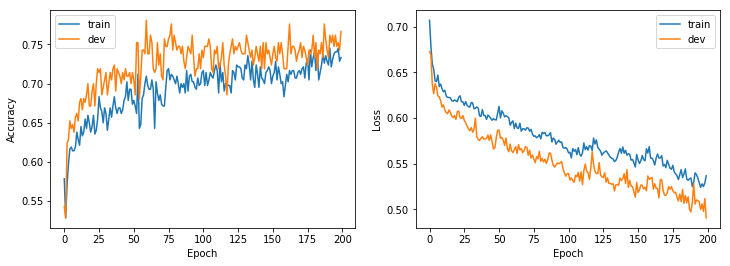

In [66]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

ax1.plot(history_training.history['acc'], label='train')
ax1.plot(history_training.history['val_acc'], label='dev')

ax2.plot(history_training.history['loss'], label='train')
ax2.plot(history_training.history['val_loss'], label='dev')

ax1.set_xlabel('Epoch')
ax2.set_xlabel('Epoch')
ax1.legend()
ax2.legend()

ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Loss')

best_acc = max(history_training.history['val_acc'])
print(f'Best accuracy on the dev set: {best_acc*100:.1f}%')
best_acc_training = max(history_training.history['acc'])
print(f'Best accuracy on the training set: {best_acc_training*100:.1f}%')
#fig.savefig(f'../plots/model_{version}.png', bbox_inches='tight')

## Evaluation of the model

In [3]:
model = load_model(f'../models/best_model_{version}.pkl') # load best model

In [12]:
dev_preds = model.predict_classes(X_dev)
acc_dev = accuracy_score(y_dev, dev_preds)
print(f'Accuracy on the dev set: {acc_dev*100:.1f}%')

training_preds = model.predict_classes(X_train)
acc_training = accuracy_score(y_train, training_preds)
print(f'Accuracy on the training set: {acc_training*100:.1f}%')

Accuracy on the dev set: 76.2%
Accuracy on the training set: 74.5%


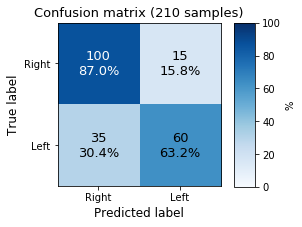

In [13]:
import itertools
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_dev, dev_preds)

classes=['Right', 'Left']
fig, ax = plt.subplots(1, figsize=(3,3))
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

cm_norm = cm / cm.sum(axis=1)*100
im = ax.imshow(cm_norm, cmap='Blues', interpolation='none', clim=(0,100))
ax.set_title(f'Confusion matrix ({y_dev.shape[0]} samples)', size=13)


for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    ax.text(j, i, f'{cm[i,j]}\n{cm_norm[i, j]:.1f}%', size=13,
             horizontalalignment="center", verticalalignment="center",
             color="white" if cm[i, j] > 60 else "black")
ax.set_ylabel('True label', size=12)
ax.set_xlabel('Predicted label', size=12)

cb_ax = fig.add_axes([0.95, 0.12, 0.1, 0.76])
cb = fig.colorbar(im, cax=cb_ax, orientation='vertical')
cb.set_label('%')

fig.savefig(f'../plots/conf_matrix_{version}.png', bbox_inches='tight')